# Question 1: Data Cleaning & Exploring the Data

## Q1.1

lot_type refers to types of lots available at point of data retrieval. Where C refers to car lot, H for heavy vehicles and Y for motorcycles.

## Q1.2
First, we make an API call for the data from a single specified date & time using the sample code.

In [9]:
import requests
import json
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Change these values for different dates
year = "2022"
month = "4"
day = "12"
hour = "12"
minute = "30"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A00
2022-04-12T12:29:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T12:12:32,105,C,0
1,HLM,2022-04-12T12:12:42,583,C,0
2,RHM,2022-04-12T12:12:32,329,C,106
3,BM29,2022-04-12T12:12:32,97,C,1
4,Q81,2022-04-12T12:12:32,96,C,0
...,...,...,...,...,...
1961,B65M,2022-04-12T12:11:58,679,C,499
1962,B65L,2022-04-12T12:11:58,5,C,0
1963,BE3,2022-04-12T11:30:52,306,C,148
1964,BE3R,2022-04-12T11:30:52,195,C,150


Next, we make a call for the next second.

In [3]:
second = '1'
site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A01
2022-04-12T12:29:27+08:00


We notice that the updated time has not changed. Therefore, in the following step, we try to figure out the frequency
at which the data values are updated by repeatedly making the call for an interval of 90 seconds. 

In [5]:
def get_timestamp(min_str, sec_str):
    site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{min_str.zfill(2)}%3A{sec_str.zfill(2)}'
    print(site)
    response_API = requests.get(site)
    data = response_API.text
    data = json.loads(data)
    timestamp = data["items"][0]["timestamp"]
    print(timestamp)
minute = 30
second = 0
for i in range(0,90):
    if second == 59:
        minute += 1
        second = 0
    else:
        second += 1
    min_str = str(minute)
    sec_str = str(second)
    print('min: '+ min_str + ', sec: ' + sec_str)
    get_timestamp(min_str, sec_str)
    

min: 30, sec: 1
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A01
2022-04-12T12:29:27+08:00
min: 30, sec: 2
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A02
2022-04-12T12:29:27+08:00
min: 30, sec: 3
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A03
2022-04-12T12:29:27+08:00
min: 30, sec: 4
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A04
2022-04-12T12:29:27+08:00
min: 30, sec: 5
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A05
2022-04-12T12:29:27+08:00
min: 30, sec: 6
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A06
2022-04-12T12:29:27+08:00
min: 30, sec: 7
https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T12%3A30%3A07
2022-04-12T12:29:27+08:00
min: 30, sec: 8
https://api.data.gov.sg/v1/transport/carpark-a

We can see that the updated_time is changed after 1 minute, which means that time updates every 1 minute.


## Q1.3
i) As shown from https://data.gov.sg/dataset/hdb-carpark-information?view_id=398e65ae-e2cb-4312-8651-6e65d6f19ed1&resource_id=139a3035-e624-4f56-b63f-89ae28d4ae4c, there are 2182 carparks in total as stated in the dataset.

ii) This number varies based on the time. For example, at the date and time given in 1.2 at the start, there are 1966 rows which means there are 1966 carparks at that timing. However, given another timing as shown below, at 2022-04-12T15:30, there are 1967 rows now.

In [6]:
year = "2022"
month = "4"
day = "12"
hour = "15"
minute = "30"
second = "0"

site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{minute.zfill(2)}%3A{second.zfill(2)}'
print(site)
response_API = requests.get(site)
data = response_API.text
data = json.loads(data)
timestamp = data["items"][0]["timestamp"]
print(timestamp)

data = data["items"][0]["carpark_data"]
with open("EE4211data.json", 'w') as fp:
    json.dump(data, fp)
df = pd.read_json("EE4211data.json")
for heading in ("total_lots","lot_type","lots_available"):
    df[heading] = df["carpark_info"].apply(lambda x: x[0][heading])
df = df.drop(["carpark_info"], axis=1)
df

https://api.data.gov.sg/v1/transport/carpark-availability?date_time=2022-04-12T15%3A30%3A00
2022-04-12T15:29:27+08:00


,carpark_number,update_datetime,total_lots,lot_type,lots_available
0,HE12,2022-04-12T15:15:02,105,C,14
1,HLM,2022-04-12T15:15:15,583,C,40
2,RHM,2022-04-12T15:15:02,329,C,202
3,BM29,2022-04-12T15:15:02,97,C,2
4,Q81,2022-04-12T15:15:06,96,C,26
...,...,...,...,...,...
1962,B65L,2022-04-12T15:15:58,5,C,0
1963,JB1,2022-04-12T14:55:17,80,Y,50
1964,BE3,2022-04-12T14:16:56,306,C,159
1965,BE3R,2022-04-12T14:16:56,195,C,145


In [7]:
df.iloc[40]

carpark_number                     RCB
update_datetime    2017-03-31T12:00:21
total_lots                         320
lot_type                             C
lots_available                     181
Name: 40, dtype: object

iii) Using the date and timing in 1.3ii), we observed that there are some carpark with malfunctioning sensors. For example, for carpark RCB from column index 40, the data has not been updated since 2017-3-31T12:00:21, this suggests that the carpark sensor was malfunctioned from that time onwards.

## Q1.4

We selected Sept 2022 to visualize the data. For missing carpark data, we choose to ignore them. Since the data in aggregated in hours with over 1900+ carparks, few missing data points do not pose a significant problem.

In [6]:
import datetime
from retry import retry
@retry(tries=3, delay=5)
def getDataAtTimestamp(year, month, day, hour, min_str='01', sec_str = '00'):
    try:
        site = f'https://api.data.gov.sg/v1/transport/carpark-availability?date_time={year}-{month.zfill(2)}-{day.zfill(2)}T{hour.zfill(2)}%3A{min_str.zfill(2)}%3A{sec_str.zfill(2)}'
        response_API = requests.get(site)
        response_API.encoding = 'UTF-8'
        raw_data = json.loads(response_API.content)
        core_list = raw_data['items'][0]['carpark_data']
        return core_list
    except:
        print(raw_data)
        print("error in day: " + day + " hour: " + hour)
        raise Exception()

def json2csv(raw_data, year, month, day, hour):
    res_df = pd.DataFrame(columns=['timestamp', 'carpark_number', 'total_lots', 'lots_available', 'lot_type'])
    timestamp = datetime.datetime(int(year), int(month),int(day))
    timestamp = timestamp.replace(hour=int(hour), minute=0, second=0)
    for ele in raw_data:
        info = ele['carpark_info'][0]
        res_df = res_df.append({'timestamp': timestamp, 'carpark_number': ele['carpark_number'], 'total_lots': info['total_lots'], 'lots_available': info['lots_available'], 'lot_type': info['lot_type']}, ignore_index=True)
    return res_df

In [5]:
year = "2022"
month = "9"
df = pd.DataFrame(columns=['timestamp', 'total_lots', 'lots_available'])
i = 0
for day in range(0, 30):
    raw_datalist = []
    for hour in range(24):
        try:
            core_list = getDataAtTimestamp(year, month, str(day+1), str(hour))
        except:
            continue
        raw_df = json2csv(core_list, year, month, day+1, hour)
        raw_datalist.append(raw_df)
        print("done day: " + str(day+1) + " hour: " + str(hour))
    print("done day " + str(day+1))
    raw_datalist = pd.concat(raw_datalist)
    raw_datalist.to_csv(f'{str(day + 1)}.csv', index=False)


done day: 1 hour: 0


In [8]:
df = pd.DataFrame()
for i in range(1,31):
    sub = pd.read_csv(f'{str(i)}.csv')
    df = pd.concat([df, sub])
agg_df = df.groupby('timestamp').sum()
agg_df.head()

,total_lots,lots_available
timestamp,,
2022-09-01 00:00:00,722765,344008
2022-09-01 01:00:00,722786,336897
2022-09-01 02:00:00,722284,332252
2022-09-01 03:00:00,722277,330621
2022-09-01 04:00:00,722099,329834


Text(0.5, 1.0, 'Available lots over Sept 2022')

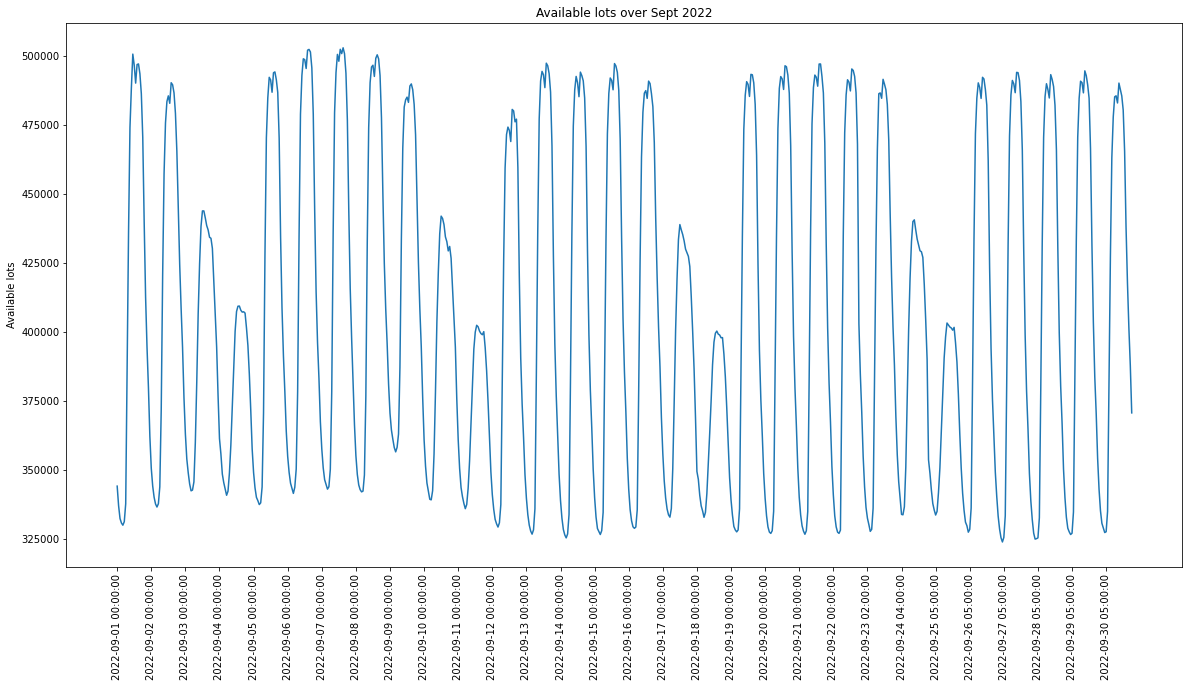

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(agg_df.index, agg_df['lots_available'])
ax.set_xticks(ax.get_xticks()[::24])
plt.xticks(rotation=90)
ax.set_ylabel('Available lots')
ax.set_title('Available lots over Sept 2022')

Text(0.5, 1.0, 'Available lots over a particular day')

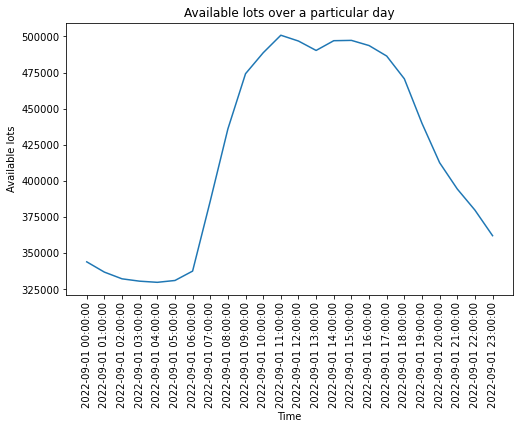

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(agg_df.index[:24], agg_df['lots_available'][:24])
ax.set_xlabel('Time')
plt.xticks(rotation=90)
ax.set_ylabel('Available lots')
ax.set_title('Available lots over a particular day')

As the plot shows, there is a strong periodic pattern over weekdays and weekends within a week. Within each day, there is also a strong periodic patttern over the days and night, whereby the carpark slots are more available at daytime when people goes to work. This corroborates with our intuition.

## Q1.5

In [5]:
df = pd.DataFrame()
for i in range(1,31):
    sub = pd.read_csv(f'{str(i)}.csv')
    df = pd.concat([df, sub])
df['available_percentage'] = df['lots_available']/df['total_lots']

In [6]:
import queue
top5 = queue.PriorityQueue()
unique_keys = set()
ids = df['carpark_number'].unique()
print(len(ids))
def correlation_generator(id1):
    sub1 = df[df['carpark_number'] == id1][['timestamp', 'available_percentage']]
    sub1.drop_duplicates(subset=['timestamp'], inplace=True)
    sub1.index = sub1['timestamp']
    for id2 in ids:
        key = (id1, id2) if id1 < id2 else (id2, id1)
        if id1 == id2 or key in unique_keys:
            continue
        sub2 = df[df['carpark_number'] == id2][['timestamp', 'available_percentage']]
        sub2.drop_duplicates(subset=['timestamp'], inplace=True)
        sub2.index = sub2['timestamp']
        sub2 = sub2.reindex(sub1.index, method='ffill')
        corr = sub1['available_percentage'].corr(sub2['available_percentage'])
        print(f"{id1} and {id2} has correlation {corr}")
        if top5.qsize() < 5:
            top5.put((corr, key))
            unique_keys.add(key)
        elif top5.queue[0][0] < corr:
            removed = top5.get()
            unique_keys.remove(removed[1])
            top5.put((corr, key))
            unique_keys.add(key)

1966


For example, we randomly choose a carcark: SK11

In [7]:
correlation_generator('SK11')

SK11 and HE12 has correlation -0.6008148912802584
SK11 and HLM has correlation -0.9272073153683272
SK11 and RHM has correlation 0.5685397049108388
SK11 and BM29 has correlation -0.9156273249519135
SK11 and Q81 has correlation -0.8760292323232872
SK11 and C20 has correlation -0.8057356354991128
SK11 and FR3M has correlation -0.4744085377990248
SK11 and C32 has correlation 0.9517063623926441
SK11 and C6 has correlation 0.43579695077299385
SK11 and TG2 has correlation 0.6704803168489036
SK11 and BP1 has correlation 0.932836762640172
SK11 and TG1 has correlation 0.9401295718911659
SK11 and TGM2 has correlation 0.5572084949628102
SK11 and TE14 has correlation 0.769287488085375
SK11 and BM3 has correlation 0.7330461758283489
SK11 and BM9 has correlation nan
SK11 and HG44 has correlation -0.5398351708243558
SK11 and HG64 has correlation -0.6985275908106727
SK11 and PM27 has correlation 0.9701283459976328
SK11 and PM28 has correlation 0.8672413419617374
SK11 and TM36 has correlation 0.96842381

In [8]:
ls = []
for i in range (5):
    ls.append(top5.get())
# while not top5.empty():
#     next_item = top5.get()
#     #print(next_item)
#     ls.append(next_item)
ls.reverse()
df = pd.DataFrame(ls,columns = ['correlation','carpark name'])
df

,correlation,carpark name
0,0.985598,"(SK11, SK60)"
1,0.985101,"(HG93, SK11)"
2,0.985052,"(CK74, SK11)"
3,0.984967,"(CK42, SK11)"
4,0.984846,"(SK11, SK99)"


## Q1.6: Team 22 Project Proposal 

### Question Prompt 
Please include a short proposal (around 500
words) of what your team intends to do for the Group Proposed Project in Question 3. For the group project proposal, you may use additional datasets to supplement your analysis or look at unaggregated data, etc. See Question 3 below for more information about this. Please use markdown in the iPython notebook to present your proposal.


### Preamble
With the steadily increasing motor vehicle population in Singapore of 957,006 in 2018 to 988,755 in 2021, parking demand also experiences an upward trend. Parking has become a major traffic issue for not only vehicle owners but also to local authorities in charge of allocating scarce land resources.

### Proposed Solution
In summary, our group wishes to create a carpark recommendation system with the ability to forecast demand. Determining the carpark’s demand at certain timeframes will be done using time-series forecast which utilised historical data to predict future demand trends. This system generally benefits vehicle owners but can be extended to be gain insights into state planning (land allocation for vehicle parking or congestion). 

From a user’s perspective, users could provide the destination (in GPS 
coordinates) and the system will provide the top-n nearest carparks and their respective current available lots. Additionally, the system will filter carparks accordingly to the user’s vehicle specifications e.g., if vehicle is of a certain height that is not allowed in a sheltered carpark. If users were to specify a timeframe in the future, they will be able to view a demand forecast graph (as seen in figure below) in hourly intervals. This feature allows users to plan their trips accordingly to avoid peak demand periods. 

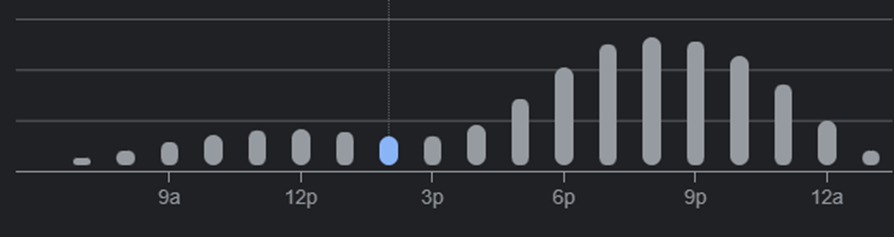

From a state planner's (such as URA, LTA and HDB) perspective, the recorded data could be used to plan for an expansion of an existing carpark or a construction of a new carpark. A carpark’s demand could also be used as an indicator of localised traffic in that area.

### Data Collection 
Carparks’ data collection is done by accessing the exposed endpoints by Data.gov.sg. On top of the carpark availability dataset, datasets such as HDB Carpark Information and Carpark Rates are used to provide users with additional information.
The key data points and their uses are shown in the table below. 

| Data | Use |
| --- | --- | 
| Carpark Availability | Training data for time-series carpark demand forecast |
| Timestamp | Timestamp that corresponds to the actual carpark availability |
| Carpark ID | Unique ID used to identify carpark which could be mapped to Carparks Info Dataset |
| Carpark Geo Coordinates | Used to calculate Euclidean distance to recommend nearest carpark |
| Carpark Type | Used to filter results to cater to user’s needs |
| Gantry Height | Used to filter results to vehicular height |
| Carpark Cost | Price point to aid users' decisions |
| Carpark opening hours | Allows system to check if carpark is available at a specific time |

### Model Prediction
The model’s output is the forecasted demand (percentage of lots filled) for a particular carpark that a user wishes to park at. The output guide users on the best timing to reach the specified carpark with the intention to avoid periods of high demand. The recommendation system utilizes the output to recommend carparks that are near and have sufficient lots.

### Potential Challenges
Our initial carpark recommendation system recommends carparks that are nearest in terms of Euclidean distance. From a user’s perspective, there are other factors to consider such as prices. Additionally, the Euclidean distance is a good indicator of the distance between the carpark and the user’s destination but has its limitation. The actual walkable distance might differ due to obstructions such as water bodies. A further enhancement to our system would be to factor these factors and provide users with a more robust recommendation.

### Conclusion
Our team’s project seeks to provide vehicle owners with a robust carpark recommendation and its forecasted demand for the day. Implementation of our model could be done with a web/phone application or integration with established wayfinding applications such as Google maps or Waze.